R2
0.9320226740564197
RMSE ML
2.9388961881150126


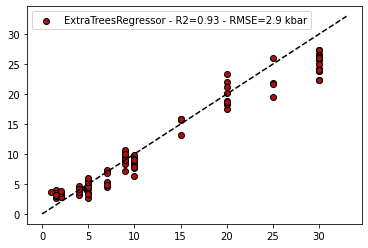

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 20 17:50:36 2019

@author: mauriziopetrelli
"""



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score


def import_Excel_unknowns(file_name):
    myLiquids = pd.read_excel(file_name, usecols = "B:M", skiprows=1)
    myLiquids = myLiquids.fillna(0)
    
    myCPXs = pd.read_excel(file_name, usecols = "O:X", skiprows=1)
    myCPXs = myCPXs.fillna(0)
    myCPXs.columns = [c.replace('.1', '') for c in myCPXs.columns]
    
    myLabels = pd.read_excel(file_name, usecols = "A", skiprows=1)
    
    return myLiquids, myCPXs, myLabels
    
def import_Excel_experiments(file_name):
    
    myLiquids = pd.read_excel(file_name, usecols = "B:M", skiprows=1)
    myLiquids = myLiquids.fillna(0)
    
    myCPXs = pd.read_excel(file_name, usecols = "O:X", skiprows=1)
    myCPXs = myCPXs.fillna(0)
    myCPXs.columns = [c.replace('.1', '') for c in myCPXs.columns]
    
    Experimental_PT = pd.read_excel(file_name, usecols = "Z:AA", skiprows=1)
    myLabels = pd.read_excel(file_name, usecols = "A", skiprows=1)
    
    #print('myCPXs')
    #print(myCPXs)
    return myLiquids, myCPXs, Experimental_PT, myLabels  



# Import Training Data
myLiquids, myCPXs, Experimental_PT, myLabels = import_Excel_experiments('GlobalDataset_Final_rev9_TrainValidation.xlsx')
a = myLiquids.values
b = myCPXs.values
X = np.concatenate((b,a),axis=1)
Y = np.array([Experimental_PT.P_GPa * 10]).T
Labels = np.array([myLabels.Sample_ID]).T

# Scaling Training Data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Define the regressor, in our case the Extra Tree Regressor
regr = ExtraTreesRegressor(n_estimators=350, criterion='mse', max_features=22, random_state=80) # random_state fixed for reproducibility

# Train the model
regr.fit(X, Y.ravel())

# Import Unknown Samples
myLiquids1, myCPXs1, Experimental_PT1, myLabels1 = import_Excel_experiments('GlobalDataset_Final_rev9_Test.xlsx')
Y_test1 = np.array([Experimental_PT1.P_GPa * 10]).T
a1 = myLiquids1.values
b1 = myCPXs1.values
X1 = np.concatenate((b1,a1),axis=1)
Y1 = np.array([Experimental_PT1.P_GPa * 10]).T
Labels1 = np.array([myLabels1.Sample_ID]).T

# Scaling Unknown Samples
X1 = scaler.transform(X1)

# Predict Unknowns
predicted = regr.predict(X1)   
r2 = r2_score(Y1, predicted)

# Print R2 and RMSE
print('R2')
print(r2)
MSE_ML = mean_squared_error(predicted, Y1)
print('RMSE ML')
print(np.sqrt(MSE_ML))

# Plot data       
plt.figure()
plt.plot([0,33],[0,33], c='#000000', linestyle='--')
plt.scatter(Y1,predicted, color='#ad1010', edgecolor='#000000', label="ExtraTreesRegressor - R2=" + str(round(r2,2)) + " - RMSE="+ str(round(np.sqrt(MSE_ML),1))+" kbar") 
plt.legend()
plt.show()     

predicted_pd=pd.DataFrame(data={'Pressure': predicted})
predicted_pd.to_clipboard(excel=True)



In [4]:
predicted_pd.iloc[0:5]

,Pressure
0,2.978894
1,3.471423
2,3.419131
3,9.580471
4,10.243200


In [5]:
myLiquids

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O
0,50.1,1.54,14.78,11.35,0.23,7.52,11.49,2.40,0.09,0.0,0.00,0.0
1,50.4,1.19,15.76,9.52,0.18,7.98,12.20,2.30,0.07,0.0,0.00,0.0
2,62.4,0.38,20.30,2.40,0.22,0.14,0.40,9.60,4.20,0.0,0.00,9.9
3,61.0,0.40,20.70,2.50,0.25,0.08,0.32,10.60,4.10,0.0,0.00,9.6
4,61.5,0.50,20.20,2.07,0.15,0.22,0.76,9.10,5.50,0.0,0.00,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...
845,49.3,3.92,11.80,14.00,0.28,5.43,9.59,2.93,0.35,0.0,0.36,0.0
846,48.4,5.28,11.20,15.40,0.23,4.99,9.40,2.76,0.43,0.0,0.49,0.0
847,50.4,2.10,13.50,11.70,0.22,7.05,11.50,2.66,0.17,0.0,0.26,0.0
848,50.1,2.52,13.40,11.90,0.16,6.30,10.80,3.31,0.38,0.0,0.19,0.0
